# Welcome to Physics Applications of AI!

Welcome to the first exercise session of Physics Applications of AI.

In this course we want to help you become familiar with standard python libraries, toolkhits and techniques for applying machine learning to physics problems.

You will work primarily with interactive python notebooks like this for the exercise classes, seeing code snippets with help text alongside them, as well as tasks for you to complete.

These exercises will help you become familiar with techniques you will then apply to your semester project. However, your semester project should not be a notebook but a set of python files in a package structure.

## So what is a notebook

This is a notebook!

They are made up of cells which are typically either markdown text or python. Any code blocks wil have `[ ]` before them, and after they are run will have `[1]` or similar, giving you an order in which the cells were run.

You can run a cell with the play button above, or using keyboard shortcuts
* control+return: run cells
* shift+return: run cells, highlight next cell below
* alt+return: run cells, insert a new cell below and highlight it

Give it a try on the next cell, we will declare the variable `x` and set its value to 42. Use the play button, or ctrl+return to run the cell. You will see it sets the cell number to `[1]`.

In [53]:
x=42

Now we have a variable in a global scope in python and we can do things with it.

Let's run the next cell which will make use of this variable

In [54]:
y = x/10
print(x,y)

42 4.2


Now if we change x and rerun the cell directly above that you just ran let's see what happens.

In [55]:
x = 23

Having rerun the cell you can see it went from `[2]` to `[4]` and it's printout corresponded to the new value of `x`.

In notebooks, the order of cells in the notebook is not what matters, but the order you run cells!

This is really useful if you want to keep a set of parameters at the top which you can easily access, change, and then rerun subsequent cells with the new values.

Notebooks can be powerful debugging tools, you can rerun cells, interupt running processes, and anything which has run remains _in scope_!

But, Notebooks are also slower and less efficient to run than python code, and can encourage bad practises (why use functions, config files and import functions from other files if you just run cells in different order) so beware! 

Although you may use a lot of snippets and repeat a lot of code in notebooks, they are no replacement for good coding practices.

## What else can I do in a notebook

A notebook is great for writing documentation, or example cases of code, but they are even better for debugging.

As well as using python you also have access to your bash terminal from within the notebook. TO use bash commands you just prefix the command with `!`.

Let's see where we are and what's in our directory

If you want, you can highlight both cells and press shift+return or ctrl+return to run them both.

In [56]:
!pwd

/home/student


In [57]:
!ls

Introduction.ipynb  README.md  data


If we had had both of those commands in one line, what would have happened?

In [58]:
!pwd
!ls

/home/student
Introduction.ipynb  README.md  data


In [59]:
print(x)
print(y)

23
4.2


With any print command, things will always be output to the notebook output.

But, if you just use the variuable itself, you will see it doesn't quite behave in the same way!

In [60]:
x
y

4.2

# Useful python libraries

Most modern computational python makes extensive use of non standard libraries. There are many reasons for this but one of the biggest is **speed**.

Python is not a fast programming language, it is a scripting langauge. But by being a scripting language we don't need to compile everything. It is also a lot easier to step into and learn than e.g. C (which is incredibly fast!) or fortran (which is very old, but can also be even faster for certain applications).

What python does have, is a huge community who develop libraries which make use of a higher level programming langauge to do all computations, but with a nice and friendly python front end.

In these tutorials we will make use of **numpy** which is the golden standard for computational calculations in python.

For machine learning we will use **tensorflow**, though you could also use **pytorch** if you wish for the project.

## Numpy

Numpy is an incredibly powerful library. You can perform calculations on arrays of numberse without for loops - everything is completely vectorised!

Imagine in standard python you have two arrays of numbers you want to add together, how would you do it?

In [61]:
a = [1, 2, 3, 4]
b = [2, 3, 4, 5]

What if we just add them together?

In [62]:
c = a + b

In [63]:
print(c)

[1, 2, 3, 4, 2, 3, 4, 5]


Nope, try again! When you have list objects in python, adding them together is concatenating lists.

The operators operate on the object type, not the element type - we need to access the elements!

In [64]:
c = []
for i in range(len(a)):
  c.append(a[i]+b[i])
print(c)

[3, 5, 7, 9]


Now that is far from ideal, having to use a for loop each time we want to do vector calculations.

We can make it faster using generator expressions, but it will be a lot of code, and for loops in python are never going to be as fast as using C.

In [65]:
c = [i+j for i,j in zip(a,b)]

How do those two implementations compare, you ask?

Well, because we are in a notebook we can actually benchmark them against oneanother with expressions!

Let's use the timeit expression and time the operations

In [66]:
%%timeit
test1 = []
for i in range(len(a)):
  test1.append(a[i]+b[i])

759 ns ± 19.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [67]:
%%timeit
test2 = [i+j for i,j in zip(a,b)]

672 ns ± 12.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


But how would we do this in numpy then, let's first import the library and have a look.

In [68]:
import numpy as np

If we convert our python lists to numpy arrays, we can now use the addition operator as expected.

In [69]:
c = np.array(a)+np.array(b)
print(c)

[3 5 7 9]


For a fair speed comparison we should already create our arrays as numpy arrays - if we always work with numpy this would be a given!

In [70]:
n_a = np.array(a)
n_b = np.array(b)

In [71]:
%%timeit
test3 = n_a+n_b

505 ns ± 3.13 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


But numpy arrays aren't limited to one dimensional arrays, they can support up to N dimensions.

We can tell the size of a numpy array from its "shape". A shape tuple specifies how many elements are in each dimension, with the number of dimensions known as its rank.

In [72]:
a = np.identity(4)

In [73]:
print(f"a=\n{a}")
print(f"shape={a.shape}")

a=
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
shape=(4, 4)


Here we see we have a 2-dimensional array with four elements in each dimension (a 4x4 matrix).

We can also now do any kind of manipulation we like with numpy arrays, just like we can with matrices.

In [74]:
print(a*3)

[[3. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 3.]]


In [75]:
print(a+np.ones_like(a))

[[2. 1. 1. 1.]
 [1. 2. 1. 1.]
 [1. 1. 2. 1.]
 [1. 1. 1. 2.]]


We can even combine arrays of different rank (ie a rank 2 array and a rank 1 array) as long as the length of the dimensions are compatible.

In [76]:
print(a+c)

[[ 4.  5.  7.  9.]
 [ 3.  6.  7.  9.]
 [ 3.  5.  8.  9.]
 [ 3.  5.  7. 10.]]


However, this has added c to the last dimension of a, i.e. to each row.

What if we wanted to add it to each column instead?

Here we need to start manipulation the arrays and taking control of how numpy "broadcasts" arrays of different size.

Here we can see the shape of c, and we see that it is a rank 1 array of length four

In [77]:
c.shape

(4,)

Even if we take its transport, it is still just a rank 1, of size four.

In [78]:
np.transpose(c).shape

(4,)

However, what if we made it a (4,1) array, or a (1,4) array? That would be the same number of elements, but now we have specified whether it is a column or row vector!

In [79]:
c1 = np.expand_dims(c,0)
c2 = np.expand_dims(c,1)

In [80]:
print(c1)

[[3 5 7 9]]


In [81]:
print(c2)

[[3]
 [5]
 [7]
 [9]]


In [82]:
print(c1.shape)
print(c2.shape)

(1, 4)
(4, 1)


In [83]:
print(a+c1)

[[ 4.  5.  7.  9.]
 [ 3.  6.  7.  9.]
 [ 3.  5.  8.  9.]
 [ 3.  5.  7. 10.]]


Here we see that we get the same result as before, but now when we have the column vector c2 we get a different result!

In [84]:
print(a+c2)

[[ 4.  3.  3.  3.]
 [ 5.  6.  5.  5.]
 [ 7.  7.  8.  7.]
 [ 9.  9.  9. 10.]]


You can tell which dimensions will be added together, or used for the operations, based on the shape and the rank.

They will always use the right-most common dimension(s) if not specific.

For tensors with the same rank, as long as where the length in each dimension differs one of the tensors has length 1, they will be combined by "tiling" the 1-dimension (aka repeating it) N times to create the same shape arrays.

Numpy can also handle multiplication just like matrices.

A lot of this can be done implicitly, again using the length 1 dimensions. But otherwise they work just like matrix multiplication. The lengths of the inner dimensions should agree ie `(a,b,c,N)*(N,d,e,f)`.

## Summary

Numpy is an incredible library with far too much content to document here. But if you ever get stuck with how to work with numpy arrays stackoverflow is your friend!

There are questions and answers to all problems, and it is a very active community.

But feel free to play around with numpy arrays and learn their functionality. There are quite a few useful functions in the library, and it is not just a matter of addition, multiplication and taking exponents.

In [85]:
# take the transpose of an array
a.transpose()

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [86]:
#create a rank 3 array and you can specify which order to rearrange the axis!
b=np.expand_dims(a,-1)
np.transpose(b,(0,2,1))

array([[[1., 0., 0., 0.]],

       [[0., 1., 0., 0.]],

       [[0., 0., 1., 0.]],

       [[0., 0., 0., 1.]]])

In [87]:
#take the log
x=np.log([5,2,3,4])
#replace elements given a condition
x=np.where(x<1,0,x)
#take natural exponent
np.exp(x)

array([5., 1., 3., 4.])

The operations in numpy arrays and how to manipulate them are very important in machine learning.

Machine learning makes use of tensors, which is just another word for an ndimensional array.
All operations are performed on tensors and making sure the shapes are right is key.

In a standard multi-layer perceptron for a classifier we take N inputs, pass them through a network and have M outputs for each class. In the case of a two class problem, M=1.

You may think then that we just have rank 1 tensors, but that's not quite true! In machine learning we train on batches of data, or consider the whole dataset.

Therefore we actually have as an input a tensor `i` of shape `(batchsize,N)`, and an output `o` of `(batchsize,M)`.

# Example: an MLP

In a multilayer perceptron we combine the simplest layers together into a small network.

In each layer we have a set number of nodes. At each node we perform an affine transformation on each input (`y=mx+c`) and take the sum over all inputs. The output of the layer is the resulting sums from all of the nodes.

Let's say in a fully connected hidden layer we have `J` nodes.
At each node all inputs are multiplied by a weight `w`, and then the sum is taken over all inputs and a bias `b` is added as a constant value (the sum over all of our `c` is independent of the inputs, so we just add one value).

Therefore each node `j` can be described as an array of weights for each incoming value in `i`, and a bias value `b_j`

Each node `j` is therefore an array of shape `(i,)` and `(1,)`, and as we have `J` nodes, we can actually now start looking at this as a matrix!

Thus, the layer `h` is described by two arrays `w` and `b` with shapes `w=(i,J)` and `b=(J,)`.

Now if we want to pass our inputs through this layer, we can write the maths as a simple matrix multiplication instead of having to visualise this as a black box.

And now instead of having to take a sum, we can do the dot product of our matrices! Remember that in terms of matrix shapes `(n,i).(i,J) = (n,J)` with the sum taken over the inner dimension!

In [127]:
#We have two values in our input array, they are 3 and 4.
#Note here that the values have been given as
[
    [3,4]
]
#Which is a rank 2 tensor (1,2). This is so that we don't run into the issue we had above with broadcasting!
#We want to make sure we have our (n,i).(i,J) multiplication over i.
#Without specifying n as 1 we have (n).(i,J) which is not possible!
i = np.array([[3,4]])

print(f"Input =\n{i},shape={i.shape}")

Input =
[[3 4]],shape=(1, 2)


In [128]:
#Our hidden layer h has four nodes, so we need a weight tensor with shape (2,4) and a bias tensor with shape (4,)
#Lets given them random values for now (we pass the shape as an argument and get values between 0 and 1)
w = np.random.random((2,4))
b = np.random.random((4,))

print(f"Weights =\n{w},shape={w.shape}")
print(f"Biases = \n{b},shape={b.shape}")

Weights =
[[0.83232235 0.78744211 0.77369747 0.80805561]
 [0.04241299 0.93202812 0.58859342 0.50010588]],shape=(2, 4)
Biases = 
[0.87470456 0.68557821 0.43703538 0.99054669],shape=(4,)


In [129]:
#Do the dot product, add the biases
_o = np.dot(i,w)
o = _o+b
print(f"Output =\n{_o},shape={_o.shape}")
print(f"Output =\n{o},shape={o.shape}")

Output =
[[2.66661902 6.09043882 4.67546607 4.42459034]],shape=(1, 4)
Output =
[[3.54132358 6.77601703 5.11250145 5.41513703]],shape=(1, 4)


Now the exact same operations could have been done even if we gave it 1000 different inputs at once in a tensor of shape `(1000,2)`!

In [130]:
print(b)

[0.87470456 0.68557821 0.43703538 0.99054669]


In [134]:
print(b.shape)

(4,)


In [136]:
print(b.reshape(4,1))

[[0.87470456]
 [0.68557821]
 [0.43703538]
 [0.99054669]]


In [139]:
print(_o.reshape(4,1))

[[2.66661902]
 [6.09043882]
 [4.67546607]
 [4.42459034]]


In [140]:
print(_o.reshape(4,1)+b)

[[3.54132358 3.35219723 3.1036544  3.65716571]
 [6.96514338 6.77601703 6.5274742  7.08098551]
 [5.55017063 5.36104428 5.11250145 5.66601276]
 [5.2992949  5.11016855 4.86162572 5.41513703]]


In [91]:
i=np.random.random((1000,2))
o = np.dot(i,w)+b

#Lets only print out five outputs though!
print(f"Output =\n{o[:5]},shape={o.shape}")

Output =
[[1.55929994 0.9477212  1.15712133 2.00566252]
 [1.936291   1.12236042 1.50537296 2.47149767]
 [1.67500282 0.93793501 1.27869784 2.13891946]
 [2.07064449 1.20061764 1.62577069 2.63996847]
 [1.18659435 0.40865047 0.89777227 1.48897248]],shape=(1000, 4)


# Loading data from a file

There are two files with data in the directory data.

Using exclamation marks find their paths and load them with `file1 = np.load("filepath")`.

These files were saved with np.savez which creates numpy directory files. You can view their contents with
`print(file.files)` and then access the arrays by their name with `file['key']`.

In [92]:
!ls data

dummy.txt  inputs.npz  layer.npz


In [93]:
path = 'data/inputs.npz'
file1 = np.load(path)
path = 'data/layer.npz'
file2 = np.load(path)

In [94]:
print(file1.files)
print(file2.files)

['inputs']
['weights', 'biases']


Set the values of `b` and `w` to the values you have loaded from the file and rerun the operations for an MLP layer given the data in `i` (create a new cell with `o = np.dot(i,w)+b`).

Check that the output you get for the first element and last element agree with what we have here:

`o[0] = [1.41871711 1.0592737  1.68353455 0.72840978]
o[-1] = [1.80848224 1.30726514 2.12530942 0.82183906]`

In [164]:
i = file1['inputs']
b = file2['biases']
w = file2['weights']
print(f'Biases:\n{b}\n and weights:\n{w}')

Biases:
[0.70100159 0.57808533 0.86964542 0.54268547]
 and weights:
[[0.84240844 0.43610242 0.95317922 0.14622526]
 [0.84414567 0.88211978 0.96244896 0.39476239]]


In [165]:
print(f'Input:\n{i}\n and inputs shape:\n{i.shape}')

Input:
[[0.60516111 0.24631138]
 [0.72508471 0.9627239 ]
 [0.88902697 0.30030197]
 ...
 [0.48417863 0.489181  ]
 [0.57487181 0.97916611]
 [0.96379834 0.35013955]]
 and inputs shape:
(1000, 2)


In [166]:
o = np.dot(i,w)+b
print(f'Output shape:\n{o.shape}')
print(f'Output[0]:\n{o[0]}')
print(f'Output[-1]:\n{o[-1]}')

Output shape:
(1000, 4)
Output[0]:
[1.41871711 1.0592737  1.68353455 0.72840978]
Output[-1]:
[1.80848224 1.30726514 2.12530942 0.82183906]


You will also come across files saved in many other formats. Some of the most common are `.h5` files which is an efficient way to store data that enables quick access to non sequential blocks in memory - you aren't restricted to loading all the data, but can instead specify a "slice" by their index.

Just like in the numpy files we loaded, arrays are stored by key name. Typically, we save our data as numpy arrays even when using machine learning toolkits.

# How about in tensorflow?

As already mentioned, tensors are just like numpy arrays, however they have a few more extra properties.

Just like numpy, everything is built on a C backend that you never need to see, and the general operations on the tensors is very similar - though some may have different names.

But unlike with numpy you can often find yourself working with symbolic tensors (not yet defined) in tensorflow, and even more importantly - we want to keep track of gradients!

In numpy, we manipulate data and get results. With tensors we want to keep track of all operations, build up a "formula" for what we have just calculated, and using the chain rule calculate the gradients with respect to our output (our cost function in machine learning).

But to get started, let's just load tensorflow and have a look at our example from before.

In [167]:
import tensorflow as tf

In [168]:
i_t = tf.convert_to_tensor(i)
w_t = tf.convert_to_tensor(w)
b_t = tf.convert_to_tensor(b)

In [169]:
#Note here it is matmul not dot!
o_t = tf.matmul(i_t,w_t)+b_t

print(o_t[0])
print(o_t[-1])

tf.Tensor([1.41871711 1.0592737  1.68353455 0.72840978], shape=(4,), dtype=float64)
tf.Tensor([1.80848224 1.30726514 2.12530942 0.82183906], shape=(4,), dtype=float64)


Here we can see we get the same values but now with a tensor object instead of a numpy array!

It is also easy to get numpy arrays from the tensors with `to_numpy()`.

If we want to track the gradients we need to jump through a hoop though - no point using memory if we don't mean to!

With tensorflow we need to specify that we want to keep track of gradients, we can use this with the GradientTape in a context scope and keep track of the inputs as our x.

And then calculate the gradient of y with respect to x

In [170]:
with tf.GradientTape() as tape:
    tape.watch(i_t)
    o_t = tf.matmul(i_t,w_t)+b_t
    g = tape.gradient(o_t,i_t)
print(g)

tf.Tensor(
[[2.37791535 3.08347681]
 [2.37791535 3.08347681]
 [2.37791535 3.08347681]
 ...
 [2.37791535 3.08347681]
 [2.37791535 3.08347681]
 [2.37791535 3.08347681]], shape=(1000, 2), dtype=float64)


In [174]:
x = tf.constant(5.0)
with tf.GradientTape() as g:
    g.watch(x)
    y=x*x
print(g.gradient(y,x))

tf.Tensor(10.0, shape=(), dtype=float32)


As we are just doing a constant operation multiplication we have just a fixed gradient across all our inputs. But here the results don't matter, more just that we can get gradients!

In machine learning we will calculate these gradients for our weights and biases as a function of our cost function (which is defined based on `y_target` `y_predict` per event).

But now you have seen the building blocks of machine learning in python! Matrix multiplication and calculating gradients.

For the rest of this course we will be using tensoflow with the Keras API for building our models. This saves us a lot of time and energy, and comes with a lot of nice extra features. Nobody in research, even ML research, does everything by hand anymore, but it is very useful to understand the workings of tensors and how they interact with one another!

Instead we work with modules, layers, models, and stack them together like pieces of lego.

In our layers we may define new operations or combinations, and the same goes for our losses. But most neural networks are built ontop of affine transformations like you've seen today, be it convolutional layers on images or graph operations on point clouds.

# Visualisation

In notebooks we can also visualise our data and produce plots in "real time" and view them within the notebook. The library of choice to go to for data visualisation is `matplotlib`. There are a lot of different plot types you can produce and you will come across, but for now let's just do something basic.

In [178]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Input dimension 1')

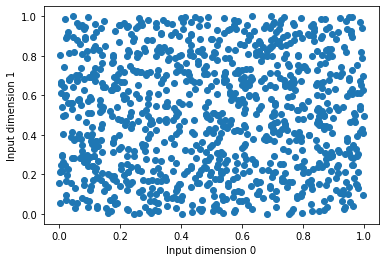

In [182]:
#Scatter plot
#Note the colon, this is used to select _all_ elements across a dimension.
#Here we choose the 0th index in the second dimension for all elements in the first dimension
plt.scatter(i[:,0],i[:,1])
plt.xlabel("Input dimension 0")
plt.ylabel("Input dimension 1")

Text(0, 0.5, 'Counts')

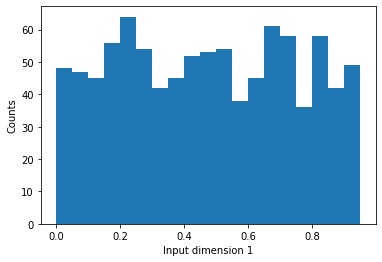

In [184]:
#Histogram
plt.hist(i[:,1],bins=np.arange(0,1,0.05))
plt.xlabel("Input dimension 1")
plt.ylabel("Counts")

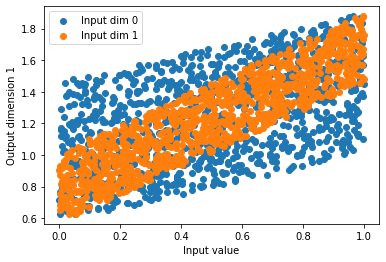

In [190]:
#Scatter plot, two data
#Note the colon, this is used to select _all_ elements across a dimension.
#Here we choose the 0th index in the second dimension for all elements in the first dimension
plt.scatter(i[:,0],o[:,1],label='Input dim 0')
plt.scatter(i[:,1],o[:,1],label='Input dim 1')
plt.xlabel("Input value")
plt.ylabel("Output dimension 1")
plt.legend()

[0.001 0.001 0.001 0.001 0.001 0.001]
1000


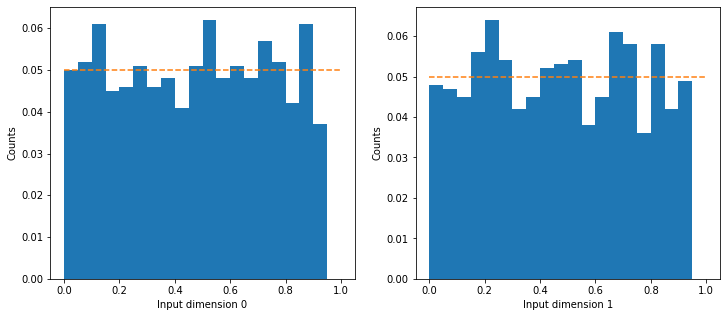

In [200]:
#And of course you can put plots side by side
fig,axes = plt.subplots(1,2)
fig.set_size_inches(12,5)
for j,ax in enumerate(axes):
    ax.hist(i[:,j],
            weights=np.ones(len(i))/len(i), 
            bins=np.arange(0,1,0.05))
    ax.plot([0,1],[1/20]*2,linestyle='--') # add a line at 0.05 for the expectation per bin
    ax.set_xlabel(f"Input dimension {j}")
    ax.set_ylabel("Counts")
weights=np.ones(len(i))/len(i)
print(weights[:6])
print(len(i))

# Extension

You can never be too familiar with numpy, it saves you from needing loops in costly operations with python.

If you aren't familiar with it, it will be a great benefit for all future computational applications to learn the basics of the library. You can find some useful tutorials [here](https://www.w3schools.com/python/numpy/default.asp).